In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
from Bio.Seq import Seq
from transformers import TFBertModel, BertTokenizer,BertConfig
import re
import pickle
import sys
import gc
import os
import shutil
import glob
from imblearn.over_sampling import SMOTE, SMOTENC, BorderlineSMOTE
import math
import random

# np.random.seed(42)
# tf.random.set_seed(42)
# os.environ['PYTHONHASHSEED']=str(42)
tf.keras.utils.set_random_seed(42)

In [2]:
# import the embeddings from each folder in full. Train test split each dataset with random seed 42 (I hope it will work) and keep only the X_test. 

# Loading Diseases

In [3]:
hiv_average_embeddings = [[None] * 1024]

In [4]:
number_param_hiv = 5
for i in range(number_param_hiv):
    with open("hiv_binary_embeddings/hiv_" + str(i) + ".pkl", "rb") as f:
        hiv_temp = pickle.load(f)
        hiv_average_embeddings = np.concatenate((hiv_average_embeddings, hiv_temp))
    f.close()

hiv_average_embeddings = np.delete(hiv_average_embeddings, 0, 0)

In [5]:
covid_average_embeddings = [[None] * 1024]

In [6]:
number_param_covid = 4
for i in range(number_param_covid):
    with open("covid_binary_embeddings/covid_" + str(i) + ".pkl", "rb") as f:
        covid_temp = pickle.load(f)
        covid_average_embeddings = np.concatenate((covid_average_embeddings, covid_temp))
    f.close()

covid_average_embeddings = np.delete(covid_average_embeddings, 0, 0)

In [7]:
influenza_average_embeddings = [[None] * 1024]

In [8]:
number_param_influenza = 1
for i in range(number_param_influenza):
    with open("influenza_binary_embeddings/influenza_" + str(i) + ".pkl", "rb") as f:
        influenza_temp = pickle.load(f)
        influenza_average_embeddings = np.concatenate((influenza_average_embeddings, influenza_temp))
    f.close()

influenza_average_embeddings = np.delete(influenza_average_embeddings, 0, 0)

In [9]:
dengue_average_embeddings = [[None] * 1024]

In [10]:
number_param_dengue = 1
for i in range(number_param_dengue):
    with open("dengue_binary_embeddings/dengue_" + str(i) + ".pkl", "rb") as f:
        dengue_temp = pickle.load(f)
        dengue_average_embeddings = np.concatenate((dengue_average_embeddings, dengue_temp))
    f.close()

dengue_average_embeddings = np.delete(dengue_average_embeddings, 0, 0)

In [11]:
cll_average_embeddings = [[None] * 1024]

In [12]:
number_param_cll = 1
for i in range(number_param_cll):
    with open("cll_binary_embeddings/cll_" + str(i) + ".pkl", "rb") as f:
        cll_temp = pickle.load(f)
        cll_average_embeddings = np.concatenate((cll_average_embeddings, cll_temp))
    f.close()

cll_average_embeddings = np.delete(cll_average_embeddings, 0, 0)

# Loading Healthy

In [13]:
healthy_average_embeddings = [[None] * 1024]

In [14]:
number_param_healthy = 14
for i in range(number_param_healthy):
    with open("hiv_binary_embeddings/healthy_" + str(i) + ".pkl", "rb") as f:
        healthy_temp = pickle.load(f)
        healthy_average_embeddings = np.concatenate((healthy_average_embeddings, healthy_temp))
    f.close()

healthy_average_embeddings_hiv = np.delete(healthy_average_embeddings, 0, 0)

In [15]:
number_param_healthy = 13
for i in range(number_param_healthy):
    with open("covid_binary_embeddings/healthy_" + str(i) + ".pkl", "rb") as f:
        healthy_temp = pickle.load(f)
        healthy_average_embeddings = np.concatenate((healthy_average_embeddings, healthy_temp))
    f.close()

healthy_average_embeddings_covid = np.delete(healthy_average_embeddings, 0, 0)

In [16]:
number_param_healthy = 2
for i in range(number_param_healthy):
    with open("influenza_binary_embeddings/healthy_" + str(i) + ".pkl", "rb") as f:
        healthy_temp = pickle.load(f)
        healthy_average_embeddings = np.concatenate((healthy_average_embeddings, healthy_temp))
    f.close()

healthy_average_embeddings_influenza = np.delete(healthy_average_embeddings, 0, 0)

In [17]:
number_param_healthy = 1
for i in range(number_param_healthy):
    with open("dengue_binary_embeddings/healthy_" + str(i) + ".pkl", "rb") as f:
        healthy_temp = pickle.load(f)
        healthy_average_embeddings = np.concatenate((healthy_average_embeddings, healthy_temp))
    f.close()

healthy_average_embeddings_dengue = np.delete(healthy_average_embeddings, 0, 0)

In [18]:
number_param_healthy = 1
for i in range(number_param_healthy):
    with open("cll_binary_embeddings/healthy_" + str(i) + ".pkl", "rb") as f:
        healthy_temp = pickle.load(f)
        healthy_average_embeddings = np.concatenate((healthy_average_embeddings, healthy_temp))
    f.close()

healthy_average_embeddings_cll = np.delete(healthy_average_embeddings, 0, 0)

In [19]:
print(healthy_average_embeddings.shape)

(86751, 1024)


# Train Test Splits

In [20]:
X = np.concatenate((healthy_average_embeddings_hiv[:len(hiv_average_embeddings)], hiv_average_embeddings))
y = np.concatenate(([0] * len(hiv_average_embeddings), [1] * len(hiv_average_embeddings)))

In [21]:
X_train, X_test_hiv, y_train, y_test_hiv = train_test_split(X, y, test_size=0.1, random_state=42)
_, X_test_hiv, _, y_test_hiv = train_test_split(X_test_hiv, y_test_hiv, test_size=0.05882, random_state=42)
print(len(y_test_hiv))

149


In [22]:
X = np.concatenate((healthy_average_embeddings_covid[:len(covid_average_embeddings)], covid_average_embeddings))
y = np.concatenate(([0] * len(covid_average_embeddings), [2] * len(covid_average_embeddings)))

In [23]:
X_train, X_test_covid, y_train, y_test_covid = train_test_split(X, y, test_size=0.1, random_state=42)
_, X_test_covid, _, y_test_covid = train_test_split(X_test_covid, y_test_covid, test_size=0.0645, random_state=42)
print(len(y_test_covid))

149


In [24]:
X = np.concatenate((healthy_average_embeddings_influenza[:len(influenza_average_embeddings)], influenza_average_embeddings))
y = np.concatenate(([0] * len(influenza_average_embeddings), [3] * len(influenza_average_embeddings)))

In [25]:
X_train, X_test_influenza, y_train, y_test_influenza = train_test_split(X, y, test_size=0.2, random_state=42)
_, X_test_influenza, _, y_test_influenza = train_test_split(X_test_influenza, y_test_influenza, test_size=0.2414, random_state=42)
print(len(y_test_influenza))

149


In [26]:
X = np.concatenate((healthy_average_embeddings_dengue[:len(dengue_average_embeddings)], dengue_average_embeddings))
y = np.concatenate(([0] * len(dengue_average_embeddings), [4] * len(dengue_average_embeddings)))

In [27]:
X_train, X_test_dengue, y_train, y_test_dengue = train_test_split(X, y, test_size=0.79, random_state=42)
print(len(y_test_dengue))

149


In [28]:
X = np.concatenate((healthy_average_embeddings_cll[:len(cll_average_embeddings)], cll_average_embeddings))
y = np.concatenate(([0] * len(cll_average_embeddings), [5] * len(cll_average_embeddings)))

In [29]:
X_train, X_test_cll, y_train, y_test_cll = train_test_split(X, y, test_size=0.99, random_state=42)
print(len(y_test_cll))

149


In [30]:
X_test = np.concatenate((X_test_hiv, X_test_covid, X_test_influenza, X_test_dengue, X_test_cll))
y_test = np.concatenate((y_test_hiv, y_test_covid, y_test_influenza, y_test_dengue, y_test_cll))
X_test = np.asarray(X_test).astype('float32')
print(X_test.shape)
print(y_test.shape)

(745, 1024)
(745,)


# Load Models

In [31]:
hiv_model = tf.keras.models.load_model("hiv_model_reserve.h5")
covid_model = tf.keras.models.load_model("../bert/prot_berd_bfd_v2.1.h5")
influenza_model = tf.keras.models.load_model("influenza_model.h5")
dengue_model = tf.keras.models.load_model("dengue_model.h5")
cll_model = tf.keras.models.load_model("cll_model.h5")
models = [hiv_model, covid_model, influenza_model, dengue_model, cll_model]

Metal device set to: Apple M1 Max

systemMemory: 64.00 GB
maxCacheSize: 24.00 GB



2023-01-29 20:34:31.497236: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-29 20:34:31.497376: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [32]:
y_pred = []
y_true = y_test

for i in X_test:
    i = np.expand_dims(i, axis=0)

    yhats = [model.predict(i) for model in models]
    if max(yhats) > 0.5:
        if np.argmax(yhats) == 0:
            y_pred.append(1)
        elif np.argmax(yhats) == 1:
            y_pred.append(2)
        elif np.argmax(yhats) == 2:
            y_pred.append(3)
        elif np.argmax(yhats) == 3:
            y_pred.append(4)
        else:
            y_pred.append(5)
    else:
        y_pred.append(0)

y_pred

1/1 [==============================] - 0s 134ms/step


2023-01-29 20:34:33.018433: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-01-29 20:34:33.067081: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-29 20:34:33.208581: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 80ms/step


2023-01-29 20:34:33.315992: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-29 20:34:33.417957: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 16ms/step


2023-01-29 20:34:33.522172: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 18ms/step


[1,
 1,
 1,
 5,
 5,
 1,
 0,
 5,
 0,
 1,
 3,
 4,
 0,
 1,
 5,
 1,
 1,
 4,
 4,
 0,
 0,
 1,
 5,
 5,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 5,
 0,
 1,
 1,
 2,
 3,
 0,
 4,
 2,
 4,
 1,
 0,
 1,
 1,
 1,
 1,
 5,
 5,
 0,
 0,
 0,
 1,
 1,
 1,
 3,
 1,
 1,
 0,
 4,
 1,
 3,
 1,
 1,
 1,
 3,
 1,
 2,
 0,
 0,
 1,
 1,
 5,
 1,
 1,
 1,
 2,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 3,
 1,
 1,
 5,
 0,
 1,
 1,
 4,
 1,
 1,
 3,
 1,
 1,
 0,
 5,
 1,
 5,
 1,
 5,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 5,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 5,
 1,
 0,
 0,
 3,
 1,
 5,
 5,
 1,
 1,
 1,
 1,
 1,
 1,
 5,
 0,
 1,
 4,
 3,
 1,
 0,
 1,
 2,
 5,
 5,
 5,
 2,
 1,
 2,
 2,
 0,
 2,
 5,
 0,
 4,
 0,
 5,
 2,
 0,
 0,
 2,
 4,
 3,
 5,
 3,
 2,
 1,
 2,
 2,
 5,
 0,
 2,
 0,
 2,
 3,
 0,
 2,
 0,
 5,
 2,
 5,
 0,
 0,
 0,
 2,
 0,
 0,
 5,
 0,
 1,
 1,
 2,
 2,
 4,
 5,
 4,
 0,
 5,
 5,
 2,
 1,
 4,
 5,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 1,
 0,
 1,
 5,
 4,
 2,
 5,
 2,
 2,
 3,
 4,
 2,
 2,
 2,
 2,
 5,
 2,
 2,
 5,
 2,
 1,
 5,
 5,
 5,
 2,
 3,
 5,
 0,
 3,
 2,


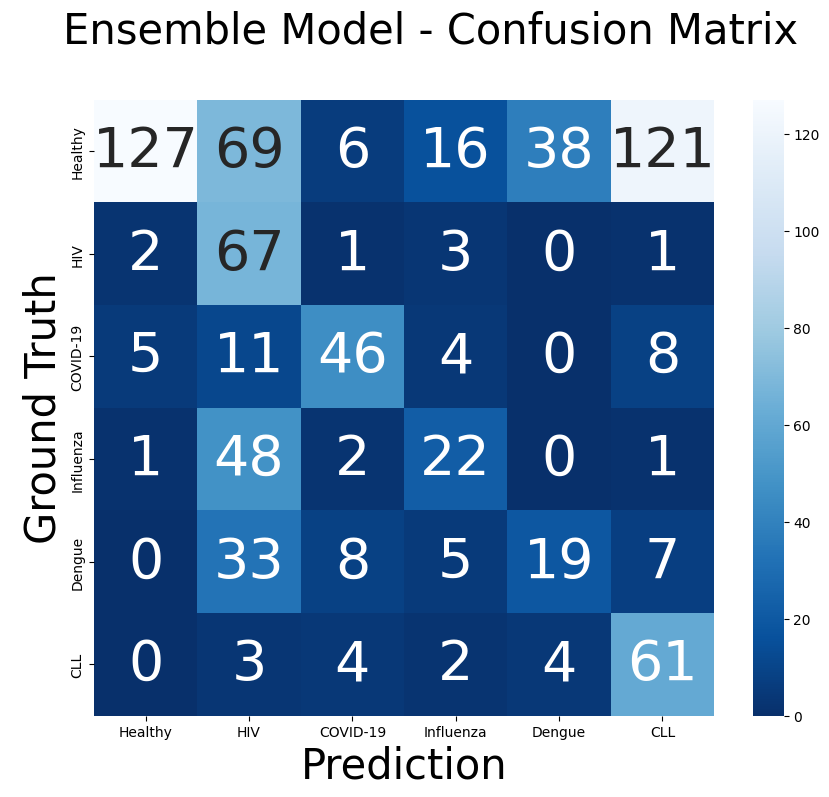

tf.Tensor(
[[127  69   6  16  38 121]
 [  2  67   1   3   0   1]
 [  5  11  46   4   0   8]
 [  1  48   2  22   0   1]
 [  0  33   8   5  19   7]
 [  0   3   4   2   4  61]], shape=(6, 6), dtype=int32)


: 

In [33]:
correct_labels = np.array(tf.concat([item for item in y_true], axis = 0))
predicted_labels = np.array(tf.concat([item for item in y_pred], axis = 0))

confusion_mtx = tf.math.confusion_matrix(correct_labels, predicted_labels)
plt.figure(figsize=(10, 8))
plt.title('    Ensemble Model - Confusion Matrix\n', fontsize=30)
# sns.set(font_scale=1.5)

cmap = sns.color_palette("Blues_r", as_cmap=True)

sns.heatmap(confusion_mtx,
            xticklabels=["Healthy", "HIV", "COVID-19", "Influenza", "Dengue", "CLL"],
            yticklabels=["Healthy", "HIV", "COVID-19", "Influenza", "Dengue", "CLL"],
            annot=True, fmt='g', annot_kws={"size":40}, cmap=cmap)
plt.xlabel('Prediction', fontsize=30)
plt.ylabel('Ground Truth', fontsize=30)
plt.show()

print(confusion_mtx)

In [ ]:
y_pred = []
y_true = y_test

for i in X_test:
    i = np.expand_dims(i, axis=0)

    yhats = [model.predict(i) for model in models]
    if max(yhats) > 0.5:
        if np.argmax(yhats) == 0:
            y_pred.append(1)
        elif np.argmax(yhats) == 1:
            y_pred.append(2)
        elif np.argmax(yhats) == 2:
            y_pred.append(3)
        elif np.argmax(yhats) == 3:
            y_pred.append(4)
        else:
            y_pred.append(5)
    else:
        y_pred.append(0)

y_pred

1/1 [==============================] - 0s 143ms/step


2023-01-29 18:50:59.998250: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-01-29 18:51:00.065995: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 88ms/step


2023-01-29 18:51:00.203835: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-29 18:51:00.321131: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 14ms/step


2023-01-29 18:51:00.434750: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-29 18:51:00.544803: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 13ms/step


[4,
 1,
 1,
 1,
 0,
 5,
 1,
 1,
 1,
 5,
 5,
 5,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 4,
 0,
 3,
 5,
 5,
 3,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 5,
 5,
 1,
 1,
 3,
 1,
 1,
 1,
 5,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 5,
 1,
 1,
 0,
 0,
 5,
 0,
 0,
 0,
 5,
 5,
 1,
 0,
 0,
 1,
 1,
 2,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 5,
 3,
 5,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 2,
 5,
 1,
 4,
 1,
 1,
 5,
 5,
 5,
 0,
 5,
 5,
 0,
 1,
 0,
 1,
 1,
 0,
 3,
 0,
 0,
 1,
 1,
 1,
 5,
 0,
 1,
 5,
 2,
 1,
 0,
 4,
 1,
 1,
 0,
 5,
 0,
 3,
 1,
 1,
 3,
 4,
 0,
 1,
 3,
 1,
 5,
 1,
 1,
 3,
 1,
 1,
 1,
 2,
 0,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 5,
 4,
 0,
 5,
 1,
 1,
 1,
 5,
 1,
 0,
 3,
 0,
 4,
 0,
 1,
 1,
 5,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 5,
 0,
 2,
 0,
 4,
 1,
 1,
 5,
 1,
 0,
 1,
 1,
 0,
 4,
 1,
 4,
 3,
 3,
 1,
 4,
 1,
 5,
 0,
 1,
 1,
 0,
 5,
 1,
 1,
 0,
 5,
 5,
 1,
 0,
 5,
 1,
 1,
 1,
 1,
 5,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 2,
 1,
 1,
 1,


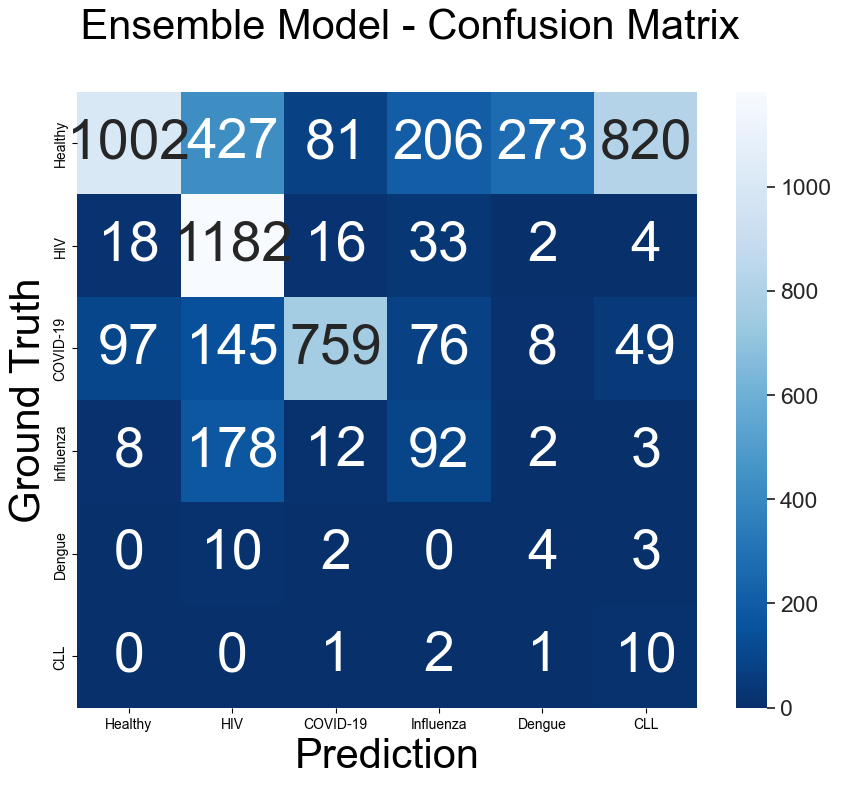

tf.Tensor(
[[1002  427   81  206  273  820]
 [  18 1182   16   33    2    4]
 [  97  145  759   76    8   49]
 [   8  178   12   92    2    3]
 [   0   10    2    0    4    3]
 [   0    0    1    2    1   10]], shape=(6, 6), dtype=int32)


In [ ]:
correct_labels = np.array(tf.concat([item for item in y_true], axis = 0))
predicted_labels = np.array(tf.concat([item for item in y_pred], axis = 0))

confusion_mtx = tf.math.confusion_matrix(correct_labels, predicted_labels)
plt.figure(figsize=(10, 8))
plt.title('    Ensemble Model - Confusion Matrix\n', fontsize=30)
sns.set(font_scale=1.5)

cmap = sns.color_palette("Blues_r", as_cmap=True)

sns.heatmap(confusion_mtx,
            xticklabels=["Healthy", "HIV", "COVID-19", "Influenza", "Dengue", "CLL"],
            yticklabels=["Healthy", "HIV", "COVID-19", "Influenza", "Dengue", "CLL"],
            annot=True, fmt='g', annot_kws={"size":40}, cmap=cmap)
plt.xlabel('Prediction', fontsize=30)
plt.ylabel('Ground Truth', fontsize=30)
plt.show()

print(confusion_mtx)